In [ ]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/Capstone/dataset_new'):
    for filename in filenames:
        os.path.join(dirname, filename)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
%matplotlib inline
import warnings, cv2
warnings.filterwarnings('ignore')
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
#!unzip "/content/dataset_new"

In [ ]:
train_dir = "/content/drive/My Drive/Colab Notebooks/Capstone/dataset_new/train/"
test_dir = "/content/drive/My Drive/Colab Notebooks/Capstone/dataset_new/test/"

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Capstone/dataset_new")
!ls

checkpoint  test  train


In [ ]:
def load_images(directory):
    image_data = []
    image_labels = []

    for category in os.listdir(directory_path):
        
        for filename in tqdm(os.listdir(os.path.join(directory_path, category))):
            image_path = os.path.join(directory_path, category, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224,224))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_data.append(image)
            image_labels.append(category)
    image_data = np.array(image_data, dtype='float32')
    return image_data, image_labels

In [ ]:
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# TRAINING

In [ ]:
cnn = Sequential()

#cnn.add(Conv2D(filters=8,kernel_size=2,activation='relu',input_shape=(224,224,3)))
#cnn.add(MaxPooling2D(pool_size=1))
cnn.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(MaxPooling2D(pool_size=2))

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Dense(units=4,activation='softmax'))


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 111, 111, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 55, 55, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
from sklearn.metrics import f1_score

cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')


In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

r = cnn.fit(x=X_train,
            y=y_train,
            epochs=12,
            batch_size=32,
            validation_data=(X_test,y_test),
            callbacks=[early_stopping,reduce_lr,model_checkpoint])



Epoch 1/8
78/78 [==============================] - ETA: 0s - loss: 0.6283 - accuracy: 0.7304
Epoch 1: val_accuracy improved from -inf to 0.25635, saving model to checkpoint/
78/78 [==============================] - 185s 2s/step - loss: 0.6283 - accuracy: 0.7304 - val_loss: 4.3228 - val_accuracy: 0.2564 - lr: 0.0010
Epoch 2/8
78/78 [==============================] - ETA: 0s - loss: 0.4097 - accuracy: 0.8058
Epoch 2: val_accuracy did not improve from 0.25635
78/78 [==============================] - 182s 2s/step - loss: 0.4097 - accuracy: 0.8058 - val_loss: 4.8681 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 3/8
78/78 [==============================] - ETA: 0s - loss: 0.3614 - accuracy: 0.8322
Epoch 3: val_accuracy did not improve from 0.25635
78/78 [==============================] - 175s 2s/step - loss: 0.3614 - accuracy: 0.8322 - val_loss: 4.6985 - val_accuracy: 0.2540 - lr: 0.0010
Epoch 4/8
78/78 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.8557
Epoch 4: val_acc

14/14 [==============================] - 10s 678ms/step
Test accuracy: 0.8775981524249422
F1 score: 0.8757245270132293


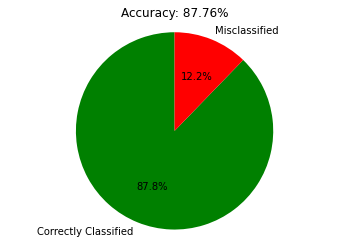

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

y_pred = cnn.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = np.argmax(y_test, axis=1)

test_accuracy = np.mean(y_pred_labels == y_true_labels)

f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print('Test accuracy:', test_accuracy)
print('F1 score:', f1)

labels = ['Correctly Classified', 'Misclassified']
sizes = [test_accuracy, 1 - test_accuracy]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Accuracy: {:.2f}%'.format(test_accuracy*100))
plt.show()



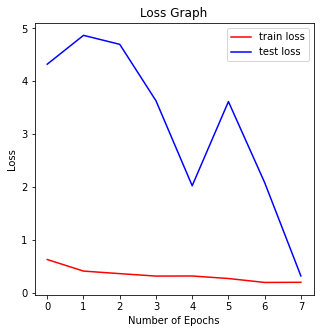

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_graph(train_loss, test_loss):
    fig = plt.figure(figsize=(5,5))

    plt.plot(train_loss, 'r', label='train loss')
    plt.plot(test_loss, 'b', label='test loss')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Graph')
    plt.legend()
    plt.show()

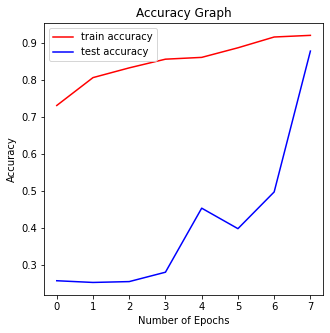

In [ ]:
def plot_accuracy(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['accuracy'], 'r', label='train accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label='test accuracy')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Graph')
    plt.legend()
    plt.show()